# GENSIM WORD2VEC EXPERIMENT

## TRAINING DATA: BROWN CORPUS
**NB: FOR PREPARATION, DO NOT RUN THIS SECTION FIRST**

In [59]:
from nltk.corpus import brown, stopwords
from nltk.stem.porter import PorterStemmer

In [60]:
%%time
words, sents = list(brown.words()), list(brown.sents())

CPU times: user 11.9 s, sys: 187 ms, total: 12.1 s
Wall time: 12.2 s


In [62]:
stop = stopwords.words('english')

In [63]:
def brown_clean(sents):
    sents = [[str(word.lower()) for word in sent] for sent in sents] # unicode->string, lowercasing.
    sents = [[word for word in sent if word not in stop] for sent in sents] # removing stopwords.
    sents = [[PorterStemmer().stem(word) for word in sent] for sent in sents] # lemmatizing.
    return sents
def brown_vocab_build(words):
    return list(set([PorterStemmer().stem(str(word.lower())) for word in words if str(word.lower()) not in stop]))

In [65]:
%%time
words = brown_vocab_build(words)
words = [str(word) for word in words] # somehow unicode->string needs to be performed again.

CPU times: user 23 s, sys: 204 ms, total: 23.2 s
Wall time: 23.2 s


In [66]:
%%time
sents = brown_clean(sents)

CPU times: user 22.3 s, sys: 197 ms, total: 22.5 s
Wall time: 22.5 s


In [67]:
print sents[0]
print words[0]

[u'fulton', u'counti', u'grand', u'juri', u'said', u'friday', u'investig', u"atlanta'", u'recent', u'primari', u'elect', u'produc', u'``', u'evid', u"''", u'irregular', u'took', u'place', u'.']
fawn


## GENSIM WORD2VEC MODEL

In [206]:
from gensim.models import Word2Vec
    # Word2Vec params:
    #  - size: dimensionality of feature vectors.
    #  - window: the maximum distance between the current and predicted word within a sentence.
    #  - alpha: initial learning rate.
    #  - seed: seed for random number generator.
    #  - min_count: ignore all words with total frequency lower than this.
    #  - max_vocab_size: limit RAM during vocab building.
    #  - sample: threshold for configuring which higher-frequency words are randomly downsampled
    #      default=1e-3, useful range is (0, 1e-5).
    #  - workers: use this many worker threads to train the model (i.e. faster with multicore machines)
    #  - iter: number of iterations over corpus.
    #  ... for the rest see https://radimrehurek.com/gensim/models/word2vec.html.

In [283]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from keras.utils.np_utils import to_categorical
%matplotlib inline

In [284]:
import os
os.chdir('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/SPAM_INTEREST_TASKS/DATA')

In [324]:
joshdata = pd.read_excel('sentiment_josh.xlsx')
joshdata.head()

,0,1
0,She has indeed contacted me I have n't contact...,1
1,The round of interviews went very well . Still...,2
2,It looks like my first reply might not have go...,2
3,We will be in Austin May NUMBER for the next r...,2
4,- MLS # NUMBER is by far my top choice because...,2


In [325]:
cristinadata = pd.read_excel('sentiment_cristina.xlsx')
jacobdata = pd.read_excel('sentiment_jacob.xlsx')

In [342]:
t1 = np.array([1,2,3,4,5,6]).reshape(2,3)
t2 = np.array([1,1,1,1,1,1]).reshape(2,3)
t3 = np.array([0,0,0,0,0,0]).reshape(2,3)
np.concatenate((t1,t2,t3))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [331]:
np.array(joshdata[0])

array([ u"She has indeed contacted me I have n't contacted her back because I 'm waiting to hear more about my husband 's job opportunity . He will be flying to Austin the day after Easter to continue the interviews and after that we should know more . If you could tell her that I will gladly contact her after that set of interviews that would be great",
       u'The round of interviews went very well . Still processing everything . I will let you know when we will be in town for the next round ... .',
       u"It looks like my first reply might not have gone through so if this is a repeat ... ..oops . The interview went very well and we 've decided to continue in the process . We should know more in the next week or so . The ball is in their court not so we 'll just have to wait and see . In the meantime , if there are more homes that meet our criteria , feel free to send them my way . Also , could you add 'pool ' to the search criteria . It 's not a must but we 've grown quite used t

In [356]:
X = np.concatenate((joshdata[0].values, cristinadata[0].values, jacobdata[0].values))
y = np.concatenate((joshdata[1].values, cristinadata[1].values, jacobdata[1].values))
y[618] = 1.
y[706] = 1.
y[1472] = 1.
y = to_categorical(y)
print X[0]
print y[0]

She has indeed contacted me I have n't contacted her back because I 'm waiting to hear more about my husband 's job opportunity . He will be flying to Austin the day after Easter to continue the interviews and after that we should know more . If you could tell her that I will gladly contact her after that set of interviews that would be great
[ 0.  1.  0.]


In [357]:
def sent_clean(sent):
    sent = nltk.word_tokenize(sent) # still unicode.
#     sent = [word for word in sent if word not in stop] # removing stopwords.
    sent = [PorterStemmer().stem(word.lower()) for word in sent]
    return sent
def build_vocab(sents): # used after sent_clean operation.
    vocab = []
    for sent in sents:
        vocab.extend(sent)
    return list(set(vocab))

In [358]:
X = map(sent_clean, X)
vocab = build_vocab(X)

In [359]:
print X[0]
print vocab[:10]

[u'she', u'ha', u'inde', u'contact', u'me', u'i', u'have', u"n't", u'contact', u'her', u'back', u'becaus', u'i', u"'m", u'wait', u'to', u'hear', u'more', u'about', u'my', u'husband', u"'s", u'job', u'opportun', u'.', u'he', u'will', u'be', u'fli', u'to', u'austin', u'the', u'day', u'after', u'easter', u'to', u'continu', u'the', u'interview', u'and', u'after', u'that', u'we', u'should', u'know', u'more', u'.', u'if', u'you', u'could', u'tell', u'her', u'that', u'i', u'will', u'gladli', u'contact', u'her', u'after', u'that', u'set', u'of', u'interview', u'that', u'would', u'be', u'great']
[u'smtp.homecity.com', u'lolthank', u'number-a', u'6pm', u'oldest', u'hate', u'whose', u'aug', u'sorri', u'deviat']


In [360]:
%%time
model = Word2Vec(X, size=5, window=4) # words -> 10D vecs.

CPU times: user 580 ms, sys: 15.1 ms, total: 595 ms
Wall time: 249 ms


In [361]:
# WORD -> VECTOR
def vectorize(model, sent): # sent -> list word vector in model.
    return [model[word] for word in sent if word in model.vocab]

In [362]:
X_vec = [vectorize(model,sent) for sent in X] # X_vec is now a list of lists of 10D vectors
                                              #                 ^        ^            ^
                                              #                 |        |            |
                                              #               corpus   sentence     word

## MLP

In [363]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.preprocessing import sequence
from sklearn.cross_validation import train_test_split

Average Sentence Length: 64


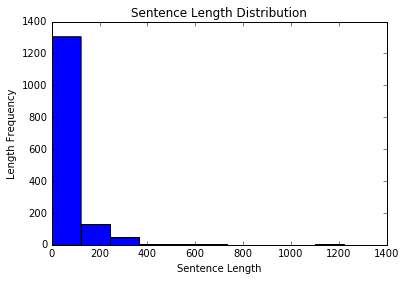

In [365]:
sentLens = [len(sent) for sent in X_vec]
meanLens = int(np.mean(sentLens))
print 'Average Sentence Length: %d' % meanLens
plt.hist(sentLens)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Length Frequency')
plt.show()
# NB: BUT WE'LL TAKE 60.

In [366]:
# INPUT SIZE UNIFORMIZATION
# FLATTENING
def flatten(sents):
    return [word for sent in sents for word in sent]
padding = np.array([0.,0.,0.,0.,0.], dtype='float32')
for i in range(len(X_vec)):
    if len(X_vec[i]) > 60:
        X_vec[i] = X_vec[i][:60]
    else: 
        X_vec[i] += [padding for _ in range(60-len(X_vec[i]))]
X_vec = map(np.array, X_vec) # to np.array, so that .shape attribute is available.
X_vec = map(flatten, X_vec)

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=.2)

In [370]:
# MLP BUILDING
model = Sequential()
model.add(Dense(100, input_dim=300, init='normal', activation='relu'))
model.add(Dense(50, init='normal', activation='relu'))
model.add(Dense(3, init='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_22 (Dense)                   (None, 100)         30100       dense_input_10[0][0]             
____________________________________________________________________________________________________
dense_23 (Dense)                   (None, 50)          5050        dense_22[0][0]                   
____________________________________________________________________________________________________
dense_24 (Dense)                   (None, 3)           153         dense_23[0][0]                   
Total params: 35303
____________________________________________________________________________________________________
None


In [371]:
%time
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=10, batch_size=50, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=0)
print 'Accuracy: %.2f%%' % (scores[1]*100)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.11 µs
Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 0s - loss: 1.0032 - acc: 0.4983 - val_loss: 0.9919 - val_acc: 0.5400
Epoch 2/10
1200/1200 [==============================] - 0s - loss: 0.8997 - acc: 0.6100 - val_loss: 0.9454 - val_acc: 0.5567
Epoch 3/10
1200/1200 [==============================] - 0s - loss: 0.8362 - acc: 0.6417 - val_loss: 0.9236 - val_acc: 0.5600
Epoch 4/10
1200/1200 [==============================] - 0s - loss: 0.7658 - acc: 0.6617 - val_loss: 0.9161 - val_acc: 0.5900
Epoch 5/10
1200/1200 [==============================] - 0s - loss: 0.6986 - acc: 0.6850 - val_loss: 0.8844 - val_acc: 0.5533
Epoch 6/10
1200/1200 [==============================] - 0s - loss: 0.6506 - acc: 0.7117 - val_loss: 0.8613 - val_acc: 0.5767
Epoch 7/10
1200/1200 [==============================] - 0s - loss: 0.6137 - acc: 0.7300 - val_loss: 0.8667 - val_acc: 0.5967
Epoch 8/10